In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Distribution plot and label assignment

## Population Change

In [ ]:
#Load Data
msa_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/4_MSA_LQ.csv')
pop_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/1_PopChange_10_16.csv')

In [ ]:
pop_data.head()

,Unnamed: 0,msaID,msaName,CountyID,CountyName,CBSA,MDIV,STCOU,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2016,PopChange
0,0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX",10180,NaN,NaN,NaN,NaN,165252.0,165252.0,170364.0,0.696193
1,12,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH",10420,NaN,NaN,NaN,NaN,703200.0,703203.0,702221.0,-0.031332
2,18,10500,"Albany, GA (Metropolitan Statistical Area)",13095,"Dougherty, GA",10500,NaN,NaN,NaN,NaN,157308.0,157500.0,152219.0,-0.728060
3,42,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",41043,"Linn, OR",10540,NaN,NaN,NaN,NaN,116672.0,116672.0,122849.0,1.191507
4,44,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",36001,"Albany, NY",10580,NaN,NaN,NaN,NaN,870716.0,870692.0,881839.0,0.287495


In [ ]:
msa_data.count()


MSA                           378
Agriculture                   378
Mining_Oil_Gas                378
Utilities                     378
Construction                  378
Manufacturing                 378
Wholesale_Trade               378
Retail_Trade                  378
Transportation_Warehousing    378
Information                   378
Finance_Insurance             378
Real_Estate                   378
Professional_Services         378
Management                    378
Administrative                378
Educational                   378
Health_Care                   378
Arts_Entertainment            378
Accommodation_Food            378
Other_Services                378
Public_Administration         378
dtype: int64

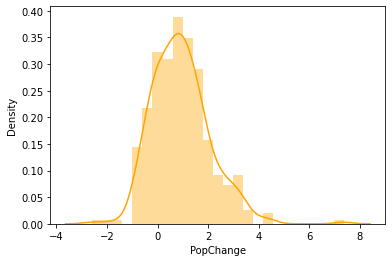

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(pop_data['PopChange'], color = 'orange')

[(-2.5898341162182965, 7.365909057667085)]

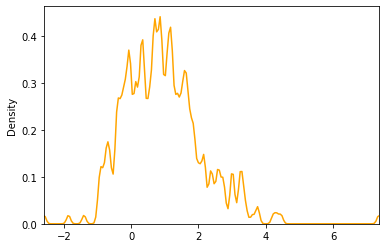

In [ ]:
plt.figure(figsize = (6,4))
data = pop_data['PopChange']
lower = pop_data['PopChange'].min()
upper = pop_data['PopChange'].max()
sns.kdeplot(np.array(data), bw = 0.05, color = 'orange').set(xlim = (lower,upper))

In [ ]:
#Classification assignment
cut_labels = ['Decrease', 'Unconspicuous Increase', 'Obvious Increase']
cut_bins = [(pop_data['PopChange'].min()-1),0,1,(pop_data['PopChange'].max()+1)]
pop_data['new_clf'] = pd.cut(pop_data['PopChange'], bins = cut_bins, labels = cut_labels)
pop_data.head()

,Unnamed: 0,msaID,msaName,CountyID,CountyName,CBSA,MDIV,STCOU,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2016,PopChange,new_clf
0,0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX",10180,NaN,NaN,NaN,NaN,165252.0,165252.0,170364.0,0.696193,Unconspicuous Increase
1,12,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH",10420,NaN,NaN,NaN,NaN,703200.0,703203.0,702221.0,-0.031332,Decrease
2,18,10500,"Albany, GA (Metropolitan Statistical Area)",13095,"Dougherty, GA",10500,NaN,NaN,NaN,NaN,157308.0,157500.0,152219.0,-0.728060,Decrease
3,42,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",41043,"Linn, OR",10540,NaN,NaN,NaN,NaN,116672.0,116672.0,122849.0,1.191507,Obvious Increase
4,44,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",36001,"Albany, NY",10580,NaN,NaN,NaN,NaN,870716.0,870692.0,881839.0,0.287495,Unconspicuous Increase


In [ ]:
pop_data['new_clf'].value_counts()

Obvious Increase          168
Unconspicuous Increase    127
Decrease                   86
Name: new_clf, dtype: int64

In [ ]:
#Merge MSA data and Population data
df = msa_data.merge(pop_data[['msaID','PopChange', 'new_clf']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std = df.drop(['PopChange','MSA'],axis=1)
#Standardize MSA data(first 13 columns)
for column in df_std.columns[0:14]:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
df_std.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,...,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Accommodation_Food,Other_Services,Public_Administration,new_clf
0,-0.290663,0.653009,1.177697,0.857006,-0.983294,0.141896,-0.046300,-0.062987,-0.032668,0.112315,...,-0.640857,-0.439254,-1.057199,2.162690,1.405519,0.691371,1.113104,1.258570,0.921930,Unconspicuous Increase
1,-0.311272,-0.217255,-0.895305,-0.363176,0.252006,1.469604,-0.689709,-0.107221,-0.105109,-0.055852,...,0.139607,2.381913,-0.191302,0.666918,1.158047,0.844240,0.919437,1.004739,0.370126,Decrease
2,0.496089,-0.260019,-0.895305,-0.276358,-0.375832,0.831689,0.960602,0.124680,-0.146828,-0.382149,...,0.286879,-0.699639,1.727944,0.176275,1.304347,0.410164,0.992618,1.017978,0.000000,Decrease
3,2.655920,-0.190264,-0.895305,0.577223,1.280606,0.257729,-0.125724,2.078001,-0.902358,-0.670352,...,-0.878048,-0.727193,-0.228053,0.277039,0.969812,0.296457,0.866384,1.128558,1.669576,Obvious Increase
4,-0.249229,-0.256963,-0.729400,-0.197460,-0.738979,-0.034902,-0.495686,-0.414329,0.597260,0.702140,...,1.220028,0.712528,-0.660117,2.078170,1.243859,1.221169,0.932402,1.008777,1.022100,Unconspicuous Increase


In [ ]:
#Split dataframe into X(features) and y(label)
X_pop = df_std.iloc[:,:14]
X_pop.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate,Professional_Services,Management,Administrative
0,-0.290663,0.653009,1.177697,0.857006,-0.983294,0.141896,-0.046300,-0.062987,-0.032668,0.112315,0.084079,-0.640857,-0.439254,-1.057199
1,-0.311272,-0.217255,-0.895305,-0.363176,0.252006,1.469604,-0.689709,-0.107221,-0.105109,-0.055852,-0.609614,0.139607,2.381913,-0.191302
2,0.496089,-0.260019,-0.895305,-0.276358,-0.375832,0.831689,0.960602,0.124680,-0.146828,-0.382149,-0.314019,0.286879,-0.699639,1.727944
3,2.655920,-0.190264,-0.895305,0.577223,1.280606,0.257729,-0.125724,2.078001,-0.902358,-0.670352,-0.565368,-0.878048,-0.727193,-0.228053
4,-0.249229,-0.256963,-0.729400,-0.197460,-0.738979,-0.034902,-0.495686,-0.414329,0.597260,0.702140,-0.129341,1.220028,0.712528,-0.660117


In [ ]:
#Split dataframe into X(features) and y(label)
y_pop = np.array(list(df_std.iloc[:,-1:].new_clf))
y_pop

array(['Unconspicuous Increase', 'Decrease', 'Decrease',
       'Obvious Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Decrease', 'Obvious Increase',
       'Obvious Increase', 'Obvious Increase', 'Decrease',
       'Unconspicuous Increase', 'Obvious Increase', 'Obvious Increase',
       'Obvious Increase', 'Decrease', 'Obvious Increase',
       'Obvious Increase', 'Obvious Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Decrease', 'Decrease',
       'Unconspicuous Increase', 'Decrease', 'Decrease',
       'Unconspicuous Increase', 'Decrease', 'Obvious Increase',
       'Obvious Increase', 'Obvious Increase', 'Decrease',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Decrease', 'Obvious Increase',
       'Obvious Increase', 'Obvious Increase', 'Obvious Increase',
       'Obvious Increase',

In [ ]:
from sklearn.model_selection import train_test_split
X_pop_train, X_pop_test, y_pop_train, y_pop_test = train_test_split(X_pop, y_pop, test_size = 0.20, random_state = 42)
X_pop_train.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate,Professional_Services,Management,Administrative
193,-0.338826,-0.260019,-0.895305,0.318289,-0.392290,-1.585784,0.361770,-0.489332,-0.571874,-0.627467,0.434407,2.294922,-0.364954,-1.122613
75,-0.315700,-0.209902,-0.677788,0.129976,-1.012086,-1.003129,-0.528952,-0.803106,1.715022,0.155133,0.682116,1.547660,-0.582262,1.664957
84,-0.324480,-0.099488,0.638460,-0.797376,0.007709,-1.187775,0.371872,-0.534315,2.803135,-0.370886,-1.378850,-0.301439,-1.152824,-0.465190
363,-0.319503,-0.019735,0.019595,0.561631,1.058136,0.022026,-0.672424,-0.104512,0.049317,-0.397785,-0.096390,-0.164005,0.456070,0.050438
16,-0.312166,-0.242512,0.127187,-0.064431,-0.761743,1.597653,-1.119497,0.846649,2.168848,0.414636,0.892174,1.279751,2.086071,1.242078


## Income Increase

In [ ]:
#Load Data
msa_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/4_MSA_LQ.csv')
income_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/2_Income_Incr_10_16.csv')

In [ ]:
income_data.head()

,Unnamed: 0,msaID,msaName,CountyID,CountyName,GeoFIPS,GeoName,Description,Unit,2010,2016,IncomeChange
0,5,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX",10180,"Abilene, TX (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,40060,42801,0.532545
1,9,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH",10420,"Akron, OH (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,45524,49008,0.595657
2,17,10500,"Albany, GA (Metropolitan Statistical Area)",13321,"Worth, GA",10500,"Albany, GA (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,38275,41271,0.609236
3,19,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",41043,"Linn, OR",10540,"Albany, OR (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,34838,39850,1.119738
4,29,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",36095,"Schoharie, NY",10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",Real per capita personal income (chained (2012...,Chained 2012 dollars,47436,51546,0.674361


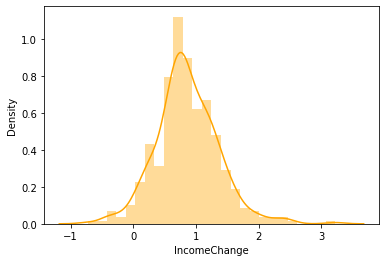

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(income_data['IncomeChange'], color = 'orange')

[(-0.7261751212558768, 3.22272204826874)]

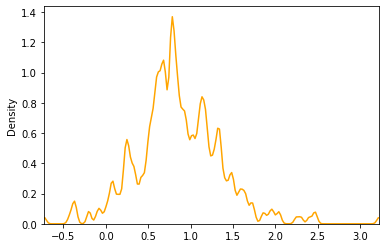

In [ ]:
plt.figure(figsize = (6,4))
data = income_data['IncomeChange']
lower = income_data['IncomeChange'].min()
upper = income_data['IncomeChange'].max()
sns.kdeplot(np.array(data), bw = 0.05, color = 'orange').set(xlim = (lower,upper))

In [ ]:
#Classification assignment
cut_labels = ['Decrease', 'Unconspicuous Increase', 'Obvious Increase']
cut_bins = [(income_data['IncomeChange'].min()-1), 0,1, (income_data['IncomeChange'].max()+1)]
income_data['new_clf'] = pd.cut(income_data['IncomeChange'], bins = cut_bins, labels = cut_labels)
income_data.head()

,Unnamed: 0,msaID,msaName,CountyID,CountyName,GeoFIPS,GeoName,Description,Unit,2010,2016,IncomeChange,new_clf
0,5,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX",10180,"Abilene, TX (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,40060,42801,0.532545,Unconspicuous Increase
1,9,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH",10420,"Akron, OH (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,45524,49008,0.595657,Unconspicuous Increase
2,17,10500,"Albany, GA (Metropolitan Statistical Area)",13321,"Worth, GA",10500,"Albany, GA (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,38275,41271,0.609236,Unconspicuous Increase
3,19,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",41043,"Linn, OR",10540,"Albany, OR (Metropolitan Statistical Area)",Real per capita personal income (chained (2012...,Chained 2012 dollars,34838,39850,1.119738,Obvious Increase
4,29,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",36095,"Schoharie, NY",10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",Real per capita personal income (chained (2012...,Chained 2012 dollars,47436,51546,0.674361,Unconspicuous Increase


In [ ]:
income_data['new_clf'].value_counts()

Unconspicuous Increase    232
Obvious Increase          137
Decrease                   12
Name: new_clf, dtype: int64

In [ ]:
#Merge MSA data and Population data
df = msa_data.merge(income_data[['msaID','IncomeChange', 'new_clf']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std = df.drop(['IncomeChange','MSA'],axis=1)
#Standardize MSA data(first 13 columns)
for column in df_std.columns[0:14]:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
df_std.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,...,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Accommodation_Food,Other_Services,Public_Administration,new_clf
0,-0.290663,0.653009,1.177697,0.857006,-0.983294,0.141896,-0.046300,-0.062987,-0.032668,0.112315,...,-0.640857,-0.439254,-1.057199,2.162690,1.405519,0.691371,1.113104,1.258570,0.921930,Unconspicuous Increase
1,-0.311272,-0.217255,-0.895305,-0.363176,0.252006,1.469604,-0.689709,-0.107221,-0.105109,-0.055852,...,0.139607,2.381913,-0.191302,0.666918,1.158047,0.844240,0.919437,1.004739,0.370126,Unconspicuous Increase
2,0.496089,-0.260019,-0.895305,-0.276358,-0.375832,0.831689,0.960602,0.124680,-0.146828,-0.382149,...,0.286879,-0.699639,1.727944,0.176275,1.304347,0.410164,0.992618,1.017978,0.000000,Unconspicuous Increase
3,2.655920,-0.190264,-0.895305,0.577223,1.280606,0.257729,-0.125724,2.078001,-0.902358,-0.670352,...,-0.878048,-0.727193,-0.228053,0.277039,0.969812,0.296457,0.866384,1.128558,1.669576,Obvious Increase
4,-0.249229,-0.256963,-0.729400,-0.197460,-0.738979,-0.034902,-0.495686,-0.414329,0.597260,0.702140,...,1.220028,0.712528,-0.660117,2.078170,1.243859,1.221169,0.932402,1.008777,1.022100,Unconspicuous Increase


In [ ]:
#Split dataframe into X(features) and y(label)
X_income = df_std.iloc[:,:14]
X_income.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate,Professional_Services,Management,Administrative
0,-0.290663,0.653009,1.177697,0.857006,-0.983294,0.141896,-0.046300,-0.062987,-0.032668,0.112315,0.084079,-0.640857,-0.439254,-1.057199
1,-0.311272,-0.217255,-0.895305,-0.363176,0.252006,1.469604,-0.689709,-0.107221,-0.105109,-0.055852,-0.609614,0.139607,2.381913,-0.191302
2,0.496089,-0.260019,-0.895305,-0.276358,-0.375832,0.831689,0.960602,0.124680,-0.146828,-0.382149,-0.314019,0.286879,-0.699639,1.727944
3,2.655920,-0.190264,-0.895305,0.577223,1.280606,0.257729,-0.125724,2.078001,-0.902358,-0.670352,-0.565368,-0.878048,-0.727193,-0.228053
4,-0.249229,-0.256963,-0.729400,-0.197460,-0.738979,-0.034902,-0.495686,-0.414329,0.597260,0.702140,-0.129341,1.220028,0.712528,-0.660117


In [ ]:
#Split dataframe into X(features) and y(label)
y_income = np.array(list(df_std.iloc[:,-1:].new_clf))
y_income

array(['Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Obvious Increase', 'Obvious Increase',
       'Obvious Increase', 'Obvious Increase', 'Unconspicuous Increase',
       'Obvious Increase', 'Unconspicuous Increase', 'Obvious Increase',
       'Obvious Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase', 'Decrease',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Obvious Increase', 'Obvious Increase',
       'Unco

In [ ]:
from sklearn.model_selection import train_test_split
X_income_train, X_income_test, y_income_train, y_income_test = train_test_split(X_income, y_income, test_size = 0.20, random_state = 42)
X_income_train.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate,Professional_Services,Management,Administrative
193,-0.338826,-0.260019,-0.895305,0.318289,-0.392290,-1.585784,0.361770,-0.489332,-0.571874,-0.627467,0.434407,2.294922,-0.364954,-1.122613
75,-0.315700,-0.209902,-0.677788,0.129976,-1.012086,-1.003129,-0.528952,-0.803106,1.715022,0.155133,0.682116,1.547660,-0.582262,1.664957
84,-0.324480,-0.099488,0.638460,-0.797376,0.007709,-1.187775,0.371872,-0.534315,2.803135,-0.370886,-1.378850,-0.301439,-1.152824,-0.465190
363,-0.319503,-0.019735,0.019595,0.561631,1.058136,0.022026,-0.672424,-0.104512,0.049317,-0.397785,-0.096390,-0.164005,0.456070,0.050438
16,-0.312166,-0.242512,0.127187,-0.064431,-0.761743,1.597653,-1.119497,0.846649,2.168848,0.414636,0.892174,1.279751,2.086071,1.242078


## Employment Increase

In [ ]:
#Load Data
msa_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/4_MSA_LQ.csv')
emp_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/3_Emp_Incr_10_16.csv')

In [ ]:
emp_data.head()

,msaID,EmpChange
0,10180,0.444016
1,10420,0.660257
2,10500,0.415536
3,10540,1.004935
4,10580,0.809862


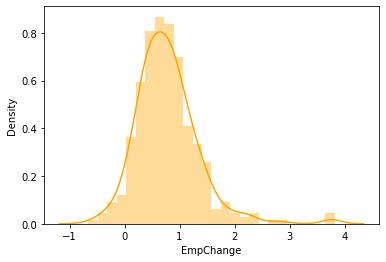

In [ ]:
plt.figure(figsize = (6,4))
sns.distplot(emp_data['EmpChange'], color = 'orange')

[(-0.6608612398673501, 3.821249296681731)]

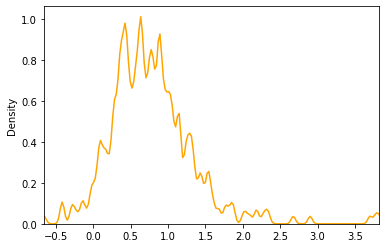

In [ ]:
plt.figure(figsize = (6,4))
data = emp_data['EmpChange']
lower = emp_data['EmpChange'].min()
upper = emp_data['EmpChange'].max()
sns.kdeplot(np.array(data), bw = 0.05, color = 'orange').set(xlim = (lower,upper))

In [ ]:
#Classification assignment
cut_labels = ['Decrease', 'Unconspicuous Increase', 'Obvious Increase']
cut_bins = [(emp_data['EmpChange'].min()-1), 0,1, (emp_data['EmpChange'].max()+1)]
emp_data['new_clf'] = pd.cut(emp_data['EmpChange'], bins = cut_bins, labels = cut_labels)
emp_data.head()

,msaID,EmpChange,new_clf
0,10180,0.444016,Unconspicuous Increase
1,10420,0.660257,Unconspicuous Increase
2,10500,0.415536,Unconspicuous Increase
3,10540,1.004935,Obvious Increase
4,10580,0.809862,Unconspicuous Increase


In [ ]:
emp_data['new_clf'].value_counts()

Unconspicuous Increase    257
Obvious Increase          107
Decrease                   17
Name: new_clf, dtype: int64

In [ ]:
#Merge MSA data and Population data
df = msa_data.merge(emp_data[['msaID','EmpChange', 'new_clf']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std = df.drop(['EmpChange','MSA'],axis=1)
#Standardize MSA data(first 13 columns)
for column in df_std.columns[0:14]:
    df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
df_std.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,...,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Accommodation_Food,Other_Services,Public_Administration,new_clf
0,-0.289948,0.654610,1.181858,0.857629,-0.982059,0.144874,-0.049472,-0.061576,-0.034398,0.116730,...,-0.643318,-0.436689,-1.052549,2.162690,1.405519,0.691371,1.113104,1.258570,0.921930,Unconspicuous Increase
1,-0.310636,-0.218504,-0.896090,-0.363877,0.256007,1.475752,-0.692989,-0.105957,-0.107038,-0.051843,...,0.138719,2.391807,-0.185752,0.666918,1.158047,0.844240,0.919437,1.004739,0.370126,Unconspicuous Increase
2,0.499773,-0.261409,-0.896090,-0.276965,-0.373237,0.836314,0.957599,0.126712,-0.148871,-0.378926,...,0.286287,-0.697750,1.735491,0.176275,1.304347,0.410164,0.992618,1.017978,0.000000,Unconspicuous Increase
3,2.667757,-0.191425,-0.896090,0.577543,1.286909,0.260984,-0.128909,2.086496,-0.906465,-0.667825,...,-0.880986,-0.725375,-0.222540,0.277039,0.969812,0.296457,0.866384,1.128558,1.669576,Obvious Increase
4,-0.248358,-0.258342,-0.729789,-0.197982,-0.737197,-0.032347,-0.498934,-0.414081,0.597251,0.707977,...,1.221317,0.718085,-0.655054,2.078170,1.243859,1.221169,0.932402,1.008777,1.022100,Unconspicuous Increase


In [ ]:
#Split dataframe into X(features) and y(label)
X_emp = df_std.iloc[:,:14]
X_emp.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate,Professional_Services,Management,Administrative
0,-0.289948,0.654610,1.181858,0.857629,-0.982059,0.144874,-0.049472,-0.061576,-0.034398,0.116730,0.084440,-0.643318,-0.436689,-1.052549
1,-0.310636,-0.218504,-0.896090,-0.363877,0.256007,1.475752,-0.692989,-0.105957,-0.107038,-0.051843,-0.611465,0.138719,2.391807,-0.185752
2,0.499773,-0.261409,-0.896090,-0.276965,-0.373237,0.836314,0.957599,0.126712,-0.148871,-0.378926,-0.314928,0.286287,-0.697750,1.735491
3,2.667757,-0.191425,-0.896090,0.577543,1.286909,0.260984,-0.128909,2.086496,-0.906465,-0.667825,-0.567078,-0.880986,-0.725375,-0.222540
4,-0.248358,-0.258342,-0.729789,-0.197982,-0.737197,-0.032347,-0.498934,-0.414081,0.597251,0.707977,-0.129661,1.221317,0.718085,-0.655054


In [ ]:
#Split dataframe into X(features) and y(label)
y_emp = np.array(list(df_std.iloc[:,-1:].new_clf))
y_emp

array(['Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Obvious Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Decrease', 'Unconspicuous Increase',
       'Obvious Increase', 'Obvious Increase', 'Obvious Increase',
       'Decrease', 'Obvious Increase', 'Unconspicuous Increase',
       'Obvious Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Unconspicuous Increase', 'Decrease', 'Unconspicuous Increase',
       'Obvious Increase', 'Unconspicuous Increase', 'Decrease',
       'Unconspicuous Increase', 'Obvious Increase',
       'Unconspicuous Increase', 'Unconspicuous Increase',
       'Obvious Increa

In [ ]:
from sklearn.model_selection import train_test_split
X_emp_train, X_emp_test, y_emp_train, y_emp_test = train_test_split(X_emp, y_emp, test_size = 0.20, random_state = 42)
X_emp_train.head()

,Agriculture,Mining_Oil_Gas,Utilities,Construction,Manufacturing,Wholesale_Trade,Retail_Trade,Transportation_Warehousing,Information,Finance_Insurance,Real_Estate,Professional_Services,Management,Administrative
137,-0.310409,-0.226552,1.037309,0.189671,-0.993549,0.330653,0.292359,-0.209578,-0.096806,0.504203,-0.006476,-0.395767,0.459622,-1.265089
101,-0.244149,-0.230690,-0.810944,-1.021618,-0.474499,1.918156,-1.769087,-1.154974,0.050862,0.031262,-0.538831,2.754228,0.011511,-0.977932
314,-0.224240,-0.261409,-0.173533,-0.507082,0.051180,-0.198278,-0.391838,2.589653,-0.640281,-0.885070,0.093854,-0.360762,0.538840,0.031214
300,1.621290,-0.205715,-0.738487,1.024117,-0.151912,-0.342518,0.234604,0.127108,-0.240832,-0.586903,0.592713,-0.547668,-0.682350,0.655195
223,-0.338293,-0.261409,-0.896090,0.776397,1.451212,-0.173875,-0.933201,-1.405098,-0.643182,-0.267517,-0.995515,-0.689435,-1.152113,-0.159161


# Classification using PCA + RBF SVM

## Pop Change

In [ ]:
from sklearn.decomposition import KernelPCA
import itertools

#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

#Try combinations with two industries
feature_combination = []
acc_hist = 0
for i in range(2,10):
    for combination in list(itertools.combinations(X_pop.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca = kpca.fit_transform(X_pop[list(combination)])
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_pop[list(combination)],y_pop)
        labelPred = np.array(rbf_svc.predict(X_pop[list(combination)]))
        acc = accuracy(labelPred,y_pop)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))

('Real_Estate', 'Administrative'): 0.5626666666666666
('Real_Estate', 'Professional_Services', 'Administrative'): 0.624
('Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.6906666666666667
('Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7813333333333333
('Transportation_Warehousing', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.8693333333333333
('Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.9253333333333333
('Wholesale_Trade', 'Retail_Trade', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.9653333333333334
('Wholesale_Trade', 'Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.992


In [ ]:
from sklearn.decomposition import KernelPCA
import itertools

#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

#Try combinations with two industries
feature_combination = []
acc_hist = 0

for i in range(2,10):
    for combination in list(itertools.combinations(X_pop.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca_train = kpca.fit_transform(X_pop[list(combination)])
        X_pop_train, X_pop_test, y_pop_train, y_pop_test = train_test_split(X_pop, y_pop, test_size = 0.20, random_state = 42)
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_pop_train[list(combination)],y_pop_train)
        labelPred = np.array(rbf_svc.predict(X_pop_test[list(combination)]))
        acc = accuracy(labelPred,y_pop_test)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))

('Management', 'Administrative'): 0.44
('Real_Estate', 'Management', 'Administrative'): 0.49333333333333335
('Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.52
('Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.5066666666666667
('Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.5066666666666667
('Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.5333333333333333
('Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.5333333333333333
('Manufacturing', 'Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.49333333333333335


## Income Change

In [ ]:
from sklearn.decomposition import KernelPCA
import itertools

#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

#Try combinations with two industries
feature_combination = []
acc_hist = 0
for i in range(2,10):
    for combination in list(itertools.combinations(X_income.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca = kpca.fit_transform(X_income[list(combination)])
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_income[list(combination)],y_income)
        labelPred = np.array(rbf_svc.predict(X_income[list(combination)]))
        acc = accuracy(labelPred,y_income)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))

('Management', 'Administrative'): 0.6346666666666667
('Real_Estate', 'Professional_Services', 'Administrative'): 0.7093333333333334
('Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7333333333333333
('Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.8026666666666666
('Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.8666666666666667
('Retail_Trade', 'Transportation_Warehousing', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.912
('Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.9333333333333333
('Manufacturing', 'Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.9653333333333334


In [ ]:
from sklearn.decomposition import KernelPCA
import itertools

#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

#Try combinations with two industries
feature_combination = []
acc_hist = 0

for i in range(2,10):
    for combination in list(itertools.combinations(X_income.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca_train = kpca.fit_transform(X_income[list(combination)])
        X_income_train, X_income_test, y_income_train, y_income_test = train_test_split(X_income, y_income, test_size = 0.20, random_state = 42)
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_income_train[list(combination)],y_income_train)
        labelPred = np.array(rbf_svc.predict(X_income_test[list(combination)]))
        acc = accuracy(labelPred,y_income_test)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))

('Management', 'Administrative'): 0.5733333333333334
('Real_Estate', 'Management', 'Administrative'): 0.6533333333333333
('Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.5866666666666667
('Information', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.6133333333333333
('Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.64
('Retail_Trade', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.6133333333333333
('Wholesale_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.6
('Manufacturing', 'Wholesale_Trade', 'Retail_Trade', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.5866666666666667


## Employment Change

In [ ]:
from sklearn.decomposition import KernelPCA
import itertools

#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

#Try combinations with two industries
feature_combination = []
acc_hist = 0
for i in range(2,10):
    for combination in list(itertools.combinations(X_emp.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca = kpca.fit_transform(X_emp[list(combination)])
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_emp[list(combination)],y_emp)
        labelPred = np.array(rbf_svc.predict(X_emp[list(combination)]))
        acc = accuracy(labelPred,y_emp)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))

('Professional_Services', 'Administrative'): 0.7063492063492064
('Professional_Services', 'Management', 'Administrative'): 0.7248677248677249
('Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7645502645502645
('Information', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7962962962962963
('Transportation_Warehousing', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.8492063492063492
('Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.8835978835978836
('Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.9259259259259259
('Manufacturing', 'Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.9656

In [ ]:
for i in range(2,10):
    print(list(itertools.combinations(X_emp.columns, i)))

[('Agriculture', 'Mining_Oil_Gas'), ('Agriculture', 'Utilities'), ('Agriculture', 'Construction'), ('Agriculture', 'Manufacturing'), ('Agriculture', 'Wholesale_Trade'), ('Agriculture', 'Retail_Trade'), ('Agriculture', 'Transportation_Warehousing'), ('Agriculture', 'Information'), ('Agriculture', 'Finance_Insurance'), ('Agriculture', 'Real_Estate'), ('Agriculture', 'Professional_Services'), ('Agriculture', 'Management'), ('Agriculture', 'Administrative'), ('Mining_Oil_Gas', 'Utilities'), ('Mining_Oil_Gas', 'Construction'), ('Mining_Oil_Gas', 'Manufacturing'), ('Mining_Oil_Gas', 'Wholesale_Trade'), ('Mining_Oil_Gas', 'Retail_Trade'), ('Mining_Oil_Gas', 'Transportation_Warehousing'), ('Mining_Oil_Gas', 'Information'), ('Mining_Oil_Gas', 'Finance_Insurance'), ('Mining_Oil_Gas', 'Real_Estate'), ('Mining_Oil_Gas', 'Professional_Services'), ('Mining_Oil_Gas', 'Management'), ('Mining_Oil_Gas', 'Administrative'), ('Utilities', 'Construction'), ('Utilities', 'Manufacturing'), ('Utilities', 'Whol

In [ ]:
from sklearn.decomposition import KernelPCA
import itertools

#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

#Try combinations with two industries
feature_combination = []
acc_hist = 0

for i in range(2,10):
    for combination in list(itertools.combinations(X_emp.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca_train = kpca.fit_transform(X_emp[list(combination)])
        X_emp_train, X_emp_test, y_emp_train, y_emp_test = train_test_split(X_emp, y_emp, test_size = 0.20, random_state = 42)
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_emp_train[list(combination)],y_emp_train)
        labelPred = np.array(rbf_svc.predict(X_emp_test[list(combination)]))
        acc = accuracy(labelPred,y_emp_test)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))

('Management', 'Administrative'): 0.6973684210526315
('Real_Estate', 'Management', 'Administrative'): 0.7236842105263158
('Finance_Insurance', 'Real_Estate', 'Management', 'Administrative'): 0.7236842105263158
('Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7236842105263158
('Transportation_Warehousing', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7368421052631579
('Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7236842105263158
('Retail_Trade', 'Transportation_Warehousing', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7236842105263158
('Manufacturing', 'Wholesale_Trade', 'Retail_Trade', 'Information', 'Finance_Insurance', 'Real_Estate', 'Professional_Services', 'Management', 'Administrative'): 0.7105263157894737


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import KernelPCA
#Try combinations with two industries
feature_combination = []
acc_hist = 0
kpca = KernelPCA(kernel='rbf', n_components=len(X.columns))
X_train_kpca = pd.DataFrame(kpca.fit_transform(X_train),columns=list(X.columns))
X_test_kpca = pd.DataFrame(kpca.transform(X_test),columns=list(X.columns))
for i in range(2,10):
    highest_in_sample_score = 0
    highest_out_sample_score = 0
    best_param = {}
    for combination in list(itertools.combinations(X_train.columns, i)):

        param_grid = {
            # 'n_estimators': np.arange(1,50,10),
            # 'max_depth' : np.arange(1,10,3),
            # 'max_leaf_nodes' : np.arange(1,5,1)
        }
        rf = RandomForestClassifier(n_jobs = -1)
        gr = GridSearchCV(rf, param_grid = param_grid)
        rs = gr.fit(X_train_kpca[list(combination)], y_train)
        if rs.score(X_test_kpca[list(combination)], y_test) > highest_out_sample_score:
            out_sample_score = rs.score(X_test_kpca[list(combination)], y_test)
            best_param = rs.best_params_

        # out of sample accuracy
    print('Best combinations: {0}, with parameter {1} ,out of sample score: {2}'.format(combination,rs.best_params_,out_sample_score))
    print('---------------------------------------------------------------------------------')